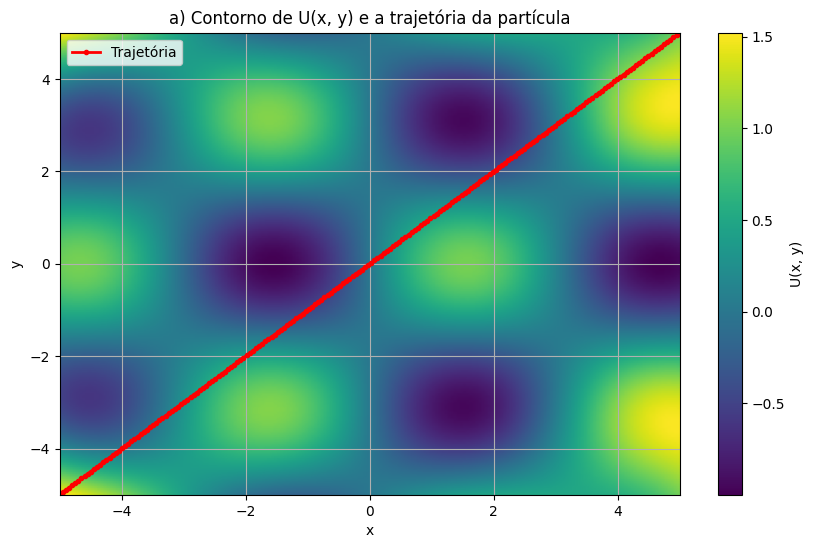

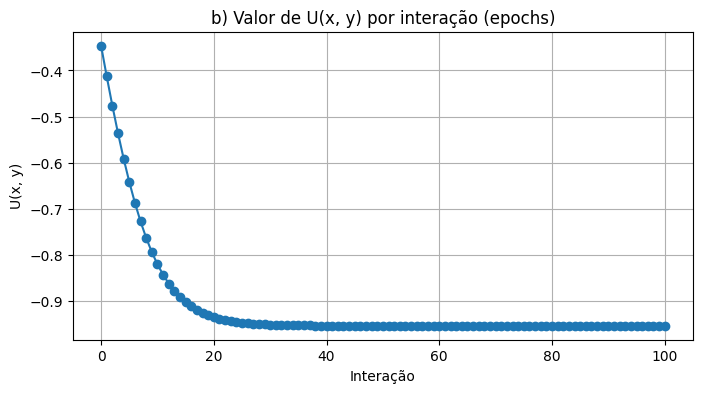

In [1]:
#Exercício 4
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Nova função de U(x,y) = sin(x)cos(y)+2(xy)^2/1000  
# Definindo a função U(x,y)
def U(x, y):
    return np.sin(x) * np.cos(y) + 2 * (x * y) ** 2 / 1000

#Definindo os gradientes de U(x,y)
def grad_U(x, y):
    dU_dx = np.cos(x) * np.cos(y) + 4 * x * y**2 / 1000
    dU_dy = -np.sin(x) * np.sin(y) + 4 * y * x**2 / 1000
    return np.array([dU_dx, dU_dy])

# Algoritmo do gradiente descendente
def gradient_descent(x0, y0, alpha=0.1, n_iter=100, epsilon=1e-6):
    traj = [(x0, y0)]
    x, y = x0, y0

    for i in range(n_iter):
        grad = grad_U(x, y)
        passo= alpha * grad
        x,y= x-passo[0], y-passo[1]
        traj.append((x, y))
        if np.linalg.norm(grad) < epsilon:
            print(f"Converge em interação:{i+1}")
            break
    return np.array(traj)

# Criar uma malha para o plano XY
x_vals = np.linspace(-5, 5, 200)
y_vals = np.linspace(-5, 5, 200)
X, Y = np.meshgrid(x_vals, y_vals)
Z = U(X, Y)

trajectory = gradient_descent(x0=2, y0=-2, alpha=0.1, epsilon=1e-6)
trajectory=np.array(trajectory)
U_vals = U(trajectory[:, 0], trajectory[:, 1])

# letra a) Plotar o gráfico de contorno
plt.figure(figsize=(10, 6))
plt.imshow(Z, extent=[-5, 5, -5, 5], origin='lower', cmap='viridis', aspect='auto')
plt.colorbar(label='U(x, y)')
plt.plot(x_vals, y_vals, color='red', marker='o', markersize=3, linewidth=2, label='Trajetória')
plt.title('a) Contorno de U(x, y) e a trajetória da partícula')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()

# letra b)Plotar o gráfico do valor de U a cada passo como função das iterações (passos) 

plt.figure(figsize=(8, 4))
plt.plot(U_vals, marker='o')
plt.title('b) Valor de U(x, y) por interação (epochs)')
plt.xlabel('Interação')
plt.ylabel('U(x, y)')
plt.grid(True)
plt.show()
